# Importing required libraries

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
color = sns.color_palette()

# Loading the Dataset and converting into dataframe

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/dayakar16/KDD_Project/main/Data/data.csv',encoding = 'ISO-8859-1')

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Cleaning

## Missing Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Checking null values in columns

In [10]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

Checking null values in rows

In [11]:
df[df.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


Removing rows and columns with null values and creating new dataframe

In [12]:
df_new = df.dropna()

In [13]:
df_new.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

## Negative and 0 Value

In [14]:
df_new["UnitPrice"].describe()

count    406829.000000
mean          3.460471
std          69.315162
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

# Exploratory Data Analysis

## Number of orders of the customers from each country

In [15]:
df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,2
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17
...,...,...,...
4375,18280.0,United Kingdom,10
4376,18281.0,United Kingdom,7
4377,18282.0,United Kingdom,13
4378,18283.0,United Kingdom,756


Visualization on the above number of orders in a graph 

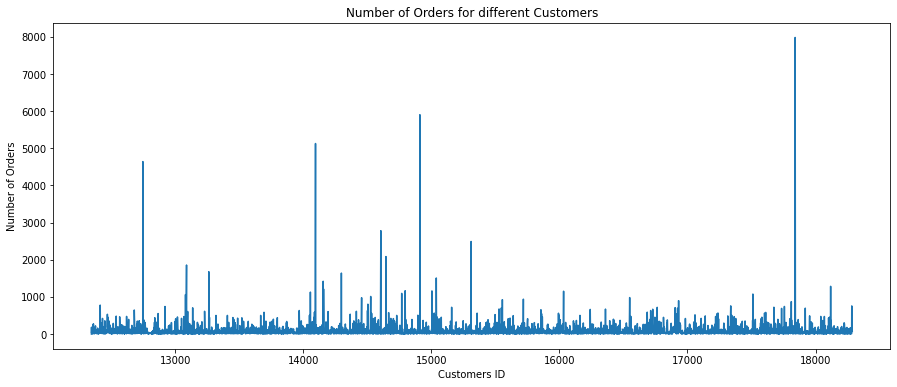

In [16]:
orders = df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [17]:
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4050,17841.0,United Kingdom,7983
1903,14911.0,EIRE,5903
1308,14096.0,United Kingdom,5128
338,12748.0,United Kingdom,4642
1682,14606.0,United Kingdom,2782


From the above graph and from above output we can see that the highest number of orders placed by a customer is 7983

## Which customer has the highest number of orders?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


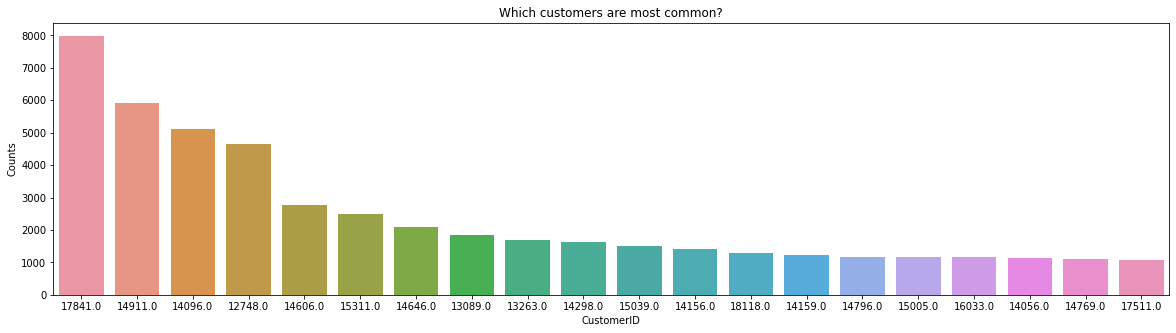

In [18]:
customer_counts = df_new.CustomerID.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");
plt.show()

## Amount of money spent in each country

Before calculating the amount of money spent. We will calculate the amount of money spent by using quantity and unit price.

In [19]:
df_new['amount_spent'] = df_new['Quantity'] * df_new['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


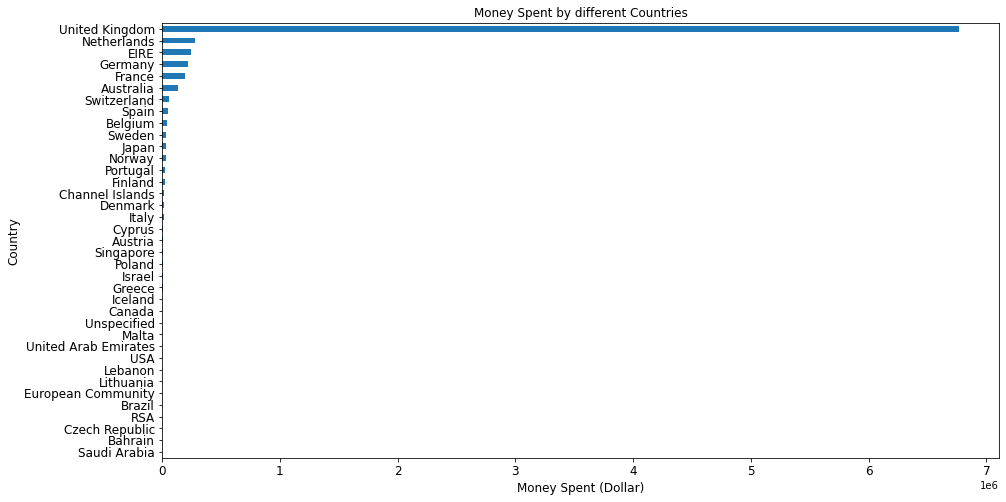

In [20]:
group_country_amount_spent = df_new.groupby('Country')['amount_spent'].sum().sort_values()

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

As we can see from the above chart that united kingdom has the highest money spending. So next we will remove the united kingdom and then see the results and compare the other countries spending.

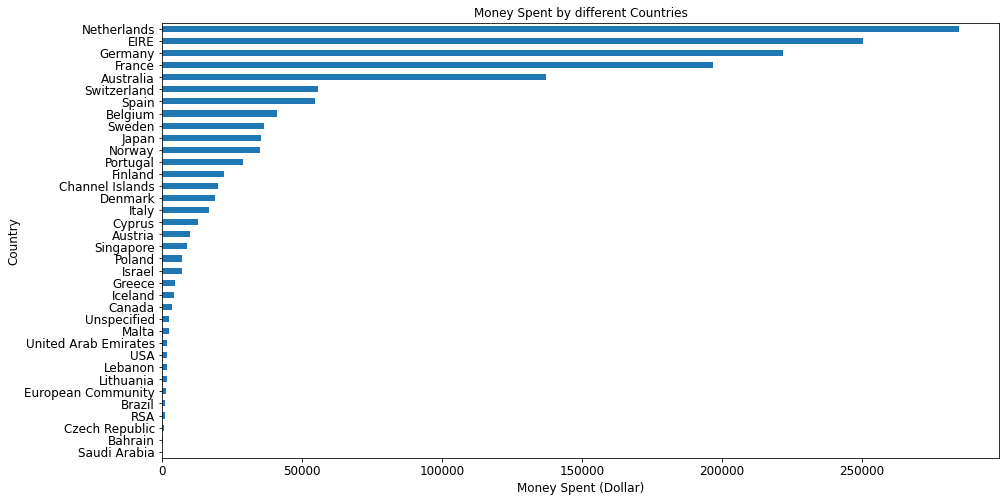

In [21]:
group_country_amount_spent = df_new.groupby('Country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

## What are the common description that are present in the given dataset?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


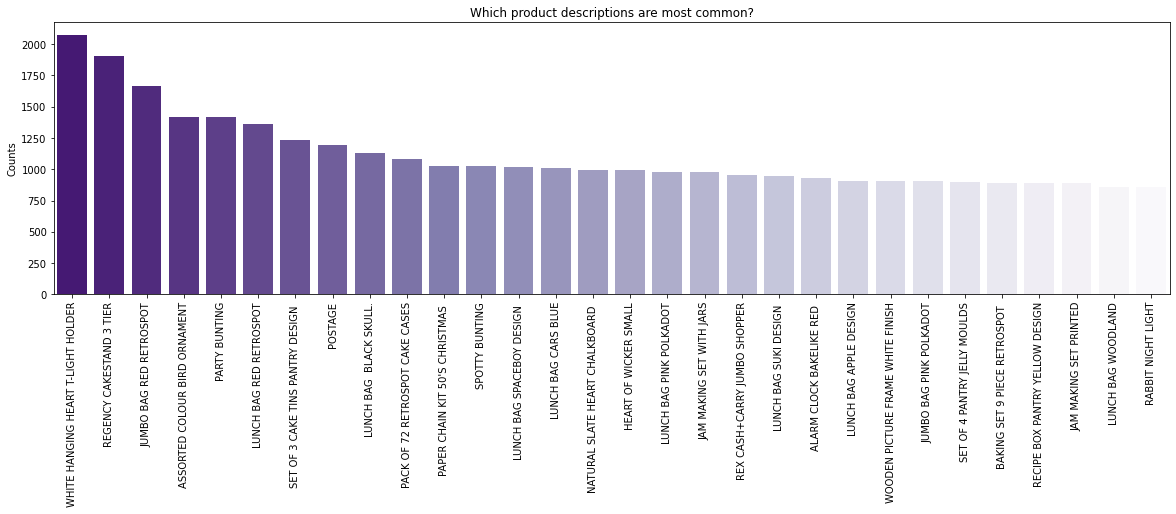

In [22]:
description_counts = df_new.Description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Which product descriptions are most common?");
plt.xticks(rotation=90);
plt.show()

Here we can see our best selling products, items that appear in orders the most often. Also to make it visually more appealing.

## What are the most common stock codes that are used in the dataset?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


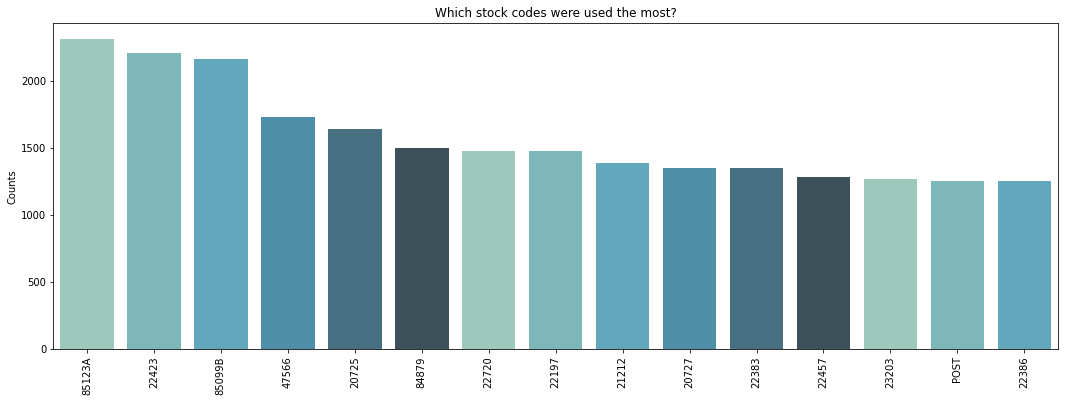

In [23]:
stock_counts = df['StockCode'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(stock_counts.index, stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?");
plt.xticks(rotation=90);
plt.show()

Also checking out stoke codes, looks like they are deeply correlated with descriptions - which makes perfect sense.

For the next deliverable we will be dealing with the predicting the sales and model development for the sales pattern.

# Data Preparation

## Creating Train-Test Split

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [25]:
X = df_new[['UnitPrice','amount_spent','CustomerID']]
y = df_new['Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

### Mean Squared Error:

The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

General steps to calculate the MSE from a set of X and Y values:

1. Find the regression line.
2. Insert your X values into the linear regression equation to find the new Y values (Y’).
3. Subtract the new Y value from the original to get the error.
4. Square the errors.
5. Add up the errors (the Σ in the formula is summation notation).
6. Find the mean.



### Cross-Validation:
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model. 

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    1. Take the group as a hold out or test data set
    2. Take the remaining groups as a training data set
    3. Fit a model on the training set and evaluate it on the test set
    4. Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

# Modeling, Evaluation and Results

We took LinearRegression, Decision Tree Regressor and Random Forest Regressor models for predicting the sales. We predicted the sales using those three algorithms and calculated the mean absolute error and cross validation for each of them to evaluate their prediction. Based on the results obtained Random Forest Regressor is the best model to predict the sales.

## Linear Regression:

Linear regression is a supervised learning algorithm and tries to model the relationship between a continuous target variable and one or more independent variables by fitting a linear equation to the data.

## Random Forest:

Random forest is an ensemble of many decision trees. Random forests are built using a method called bagging in which decision trees are used as parallel estimators. If used for a classification problem, the result is based on majority vote of the results received from each decision tree. For regression, the prediction of a leaf node is the mean value of the target values in that leaf. Random forest regression takes mean value of the results from decision trees. Random forests reduce the risk of overfitting and accuracy is much higher than a single decision tree.

## Decision Trees

A decision tree builds upon iteratively asking questions to partition data.Decision tree algorithm usually does not require to normalize or scale features. It is also suitable to work on a mixture of feature data types. On the negative side, it is prone to overfitting and needs to be ensemble in order to generalize well.


In [26]:
# LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred_reg = linreg.predict(X_test)
score_linreg_per = linreg.score(X_test, y_test) * 100
print(f'Linear Regression Model Score: {score_linreg_per}%')

#Mean Absolute Error: LINREG

val_mae_linreg = mean_absolute_error(pred_reg, y_test)
print(f'The quantity is off by: {val_mae_linreg} (MAE) for linear regression')

#Cross validation: LINREG
cv_results_linreg = cross_val_score(linreg, X, y, cv=5)
cv_results_linreg
print("Cross Validation score for linear regression:",np.mean(cv_results_linreg))

print("--------------------------------------------------------\n")

# DecisionTreeRegressor

def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

print("-------------------------------------------------------\n")   

dtr = DecisionTreeRegressor(max_leaf_nodes=500)

dtr.fit(X_train, y_train)
pred_dtr = dtr.predict(X_test)
score_dtr_per = dtr.score(X_test, y_test) * 100
print(f'Decision Tree Regressor Model Score: {score_dtr_per}%')

#MAE: DTR

val_mae_dtr = mean_absolute_error(pred_dtr, y_test)
print(f'The quantity is off by: {val_mae_dtr} (MAE) for decision tree regressor')

#CV: DTR
cv_results_dtr = cross_val_score(dtr, X, y, cv=5)
cv_results_dtr
print("The cross value for desicion tree regressor:",np.mean(cv_results_dtr))

print("--------------------------------------------------------\n")

#RandomForestRegressor

rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)
pred_rfg = rfg.predict(X_test)
score_rfg_per = rfg.score(X_test, y_test) * 100
print(f'Random Forest Regressor Model Score: {score_rfg_per}%')

#MAE: RFG
val_mae_rfg = mean_absolute_error(pred_rfg, y_test)
print(f'The quantity is off by: {val_mae_rfg} (MAE) for Random Forest Regressor')

#CV: RFG
cv_results_rfg = cross_val_score(dtr, X, y, cv=5)
cv_results_rfg
print("Cross value for Random Forest:",np.mean(cv_results_rfg))


Linear Regression Model Score: -408.07340914649586%
The quantity is off by: 8.991597894135701 (MAE) for linear regression
Cross Validation score for linear regression: -0.6246465750369995
--------------------------------------------------------

Max leaf nodes: 5  		 Mean Absolute Error:  10
Max leaf nodes: 25  		 Mean Absolute Error:  7
Max leaf nodes: 50  		 Mean Absolute Error:  4
Max leaf nodes: 100  		 Mean Absolute Error:  3
Max leaf nodes: 250  		 Mean Absolute Error:  1
Max leaf nodes: 500  		 Mean Absolute Error:  0
-------------------------------------------------------

Decision Tree Regressor Model Score: 97.27169550859067%
The quantity is off by: 0.6389595892423099 (MAE) for decision tree regressor
The cross value for desicion tree regressor: 0.616113154046415
--------------------------------------------------------

Random Forest Regressor Model Score: 99.51197978634954%
The quantity is off by: 0.08066022663028785 (MAE) for Random Forest Regressor
Cross value for Random F

From the above output we can see that the best model is the random forest regressor where the model score is around 30 where as the other models have a score of negatives.

# Future Work

For the future work we can increase the accuracy of the model by using this following
* Rely on Complete & Accurate Sales Data
* Use an Effective Sales Management System
* Keep Tabs on Factors Impacting Your Sales Forecasts
* Focus on Demand, Not Supply
* Involve Your Sales Reps When Forecasting Sales